# EDA

En la presente Notebook se realiza un análisis exploratorio de los datos previamente procesados en el [ETL](01_ETL.ipynb) con la finalidad de comprender las relaciones entre las variables disponibles y preparar los datos para la modelación de Machine Learning. Para mayor información, se encuentra disponible el [diccionario de datos](Diccionario_Datos.md) para profundizar sobre el conjunto de datos y cada variable.

## Importar librerías

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.simplefilter("ignore")
from itertools import cycle
from sklearn.preprocessing import LabelEncoder

## Carga de los datos limpios

In [69]:
df = pd.read_csv('Datasets/BBDD_hospitalizacion_2.csv')
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2,0
1,56,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
2,57,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"R AMPI, R GENTA, R SULFA",SI,4,3
3,56,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5,0
4,55,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4,3


Se realiza un análisis del resumen estadístico correspondiente a las variables numéricas, seguido por la representación visual de las distribuciones individuales de cada columna.

In [70]:
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,64.230947,14.257875,12.907621,0.168591,0.210162,0.018476
std,9.977162,17.422817,4.000088,0.845321,1.084268,0.224908
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.700000,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000,0.000000
75%,69.000000,16.000000,12.000000,0.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,9.000000,12.000000,3.000000


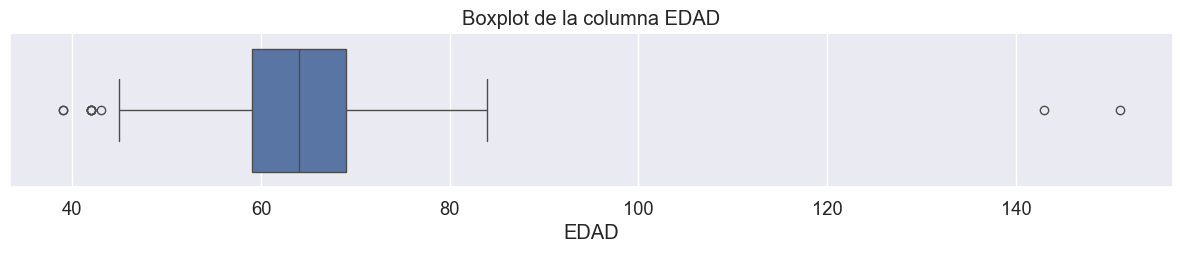

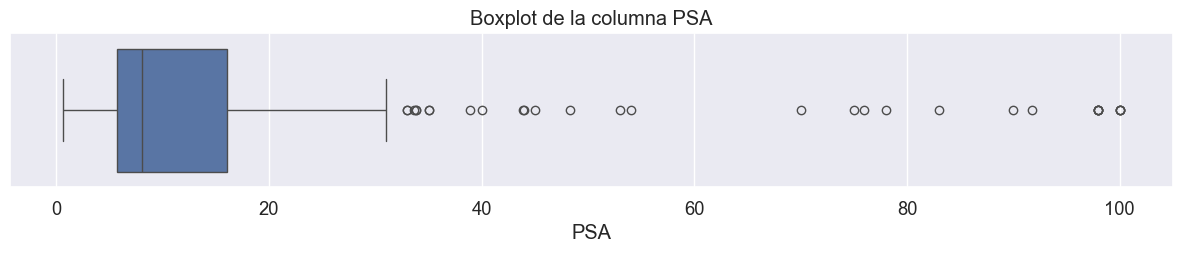

In [71]:
# Visualización de Edad y PSA
categorias = ['EDAD', 'PSA']

for categoria in categorias:
    plt.figure(figsize=(15, 2))
    sns.boxplot(data=df, x=df[categoria])
    plt.title(f'Boxplot de la columna {categoria}')
    plt.show()

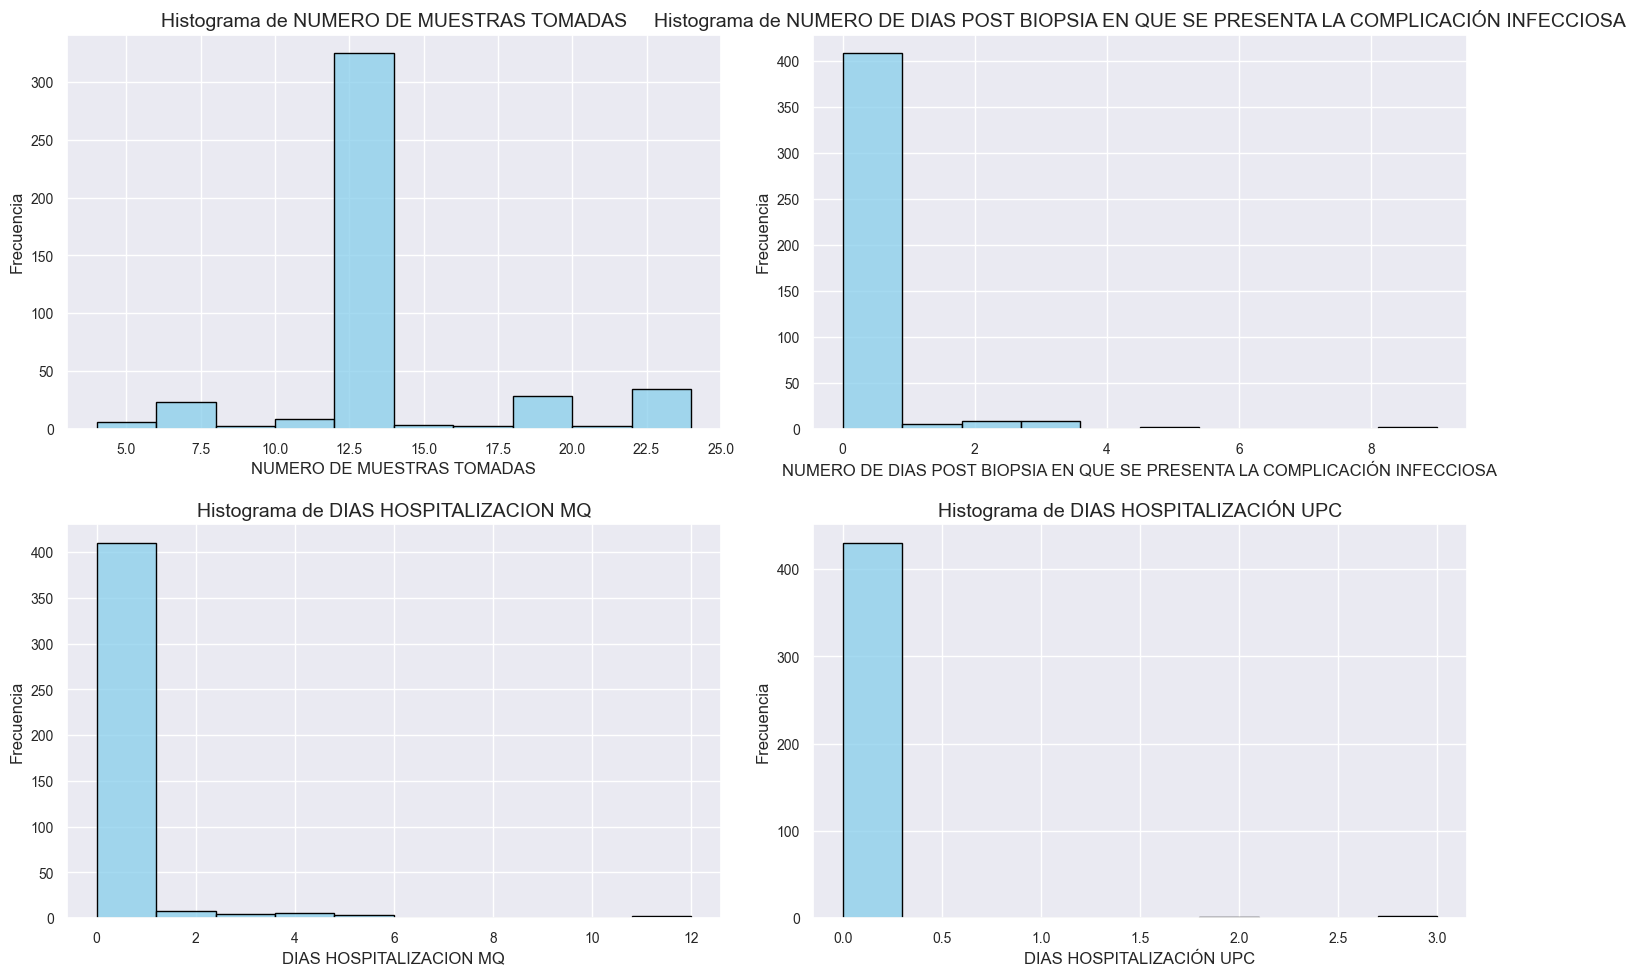

In [72]:
# Lista de columnas categóricas para generar histogramas
columnas_categoricas = ['NUMERO DE MUESTRAS TOMADAS', 
                        'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 
                        'DIAS HOSPITALIZACION MQ', 
                        'DIAS HOSPITALIZACIÓN UPC']

# Crear un grid de 2x2 para los histogramas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Iterar a través de las columnas y crear histogramas en cada eje
for i, column in enumerate(columnas_categoricas):
    row = i // 2
    col = i % 2
    sns.histplot(data=df, x=column, ax=axes[row, col], multiple="dodge", color='skyblue', edgecolor='black')

    # Configuraciones adicionales para mejorar la presentación
    axes[row, col].set_title(f'Histograma de {column}', fontsize=14)
    axes[row, col].set_xlabel(column, fontsize=12)
    axes[row, col].set_ylabel('Frecuencia', fontsize=12)
    axes[row, col].tick_params(axis='both', labelsize=10)

# Ajustar los espacios entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


En el diagrama de caja (boxplot) correspondiente a la variable 'EDAD', se identifican de manera evidente dos valores atípicos, indicando que ambos pacientes presentan una edad superior a los 140 años. Por consiguiente, se ha tomado la decisión de excluir dichos datos para posteriormente recalcular las estadísticas pertinentes.

Cantidad de valores mayores a 100 años: 0


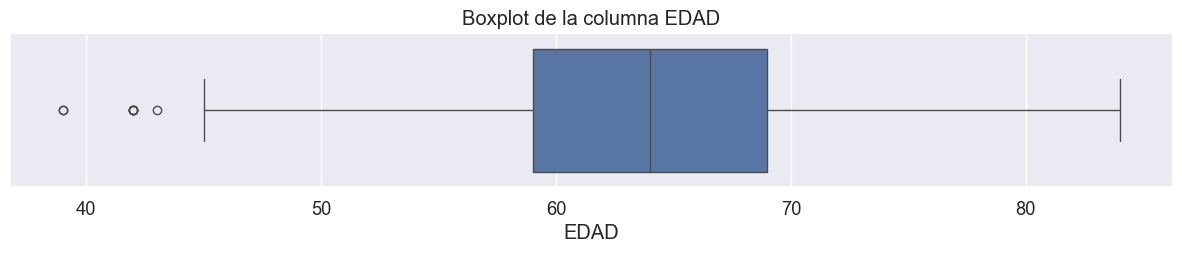

ESTADÍSTICAS DE LA COLUMNA EDAD LIMPIA
count    431.000000
mean      63.846868
std        8.241400
min       39.000000
25%       59.000000
50%       64.000000
75%       69.000000
max       84.000000
Name: EDAD, dtype: float64


In [73]:
# Filtrar valores de 'EDAD' mayores a 100
df = df[df['EDAD'] <= 100]
print('Cantidad de valores mayores a 100 años:', (df['EDAD'] > 100).sum())

# Se revisa nuevamente el boxplot de 'EDAD'
plt.figure(figsize=(15, 2))
sns.boxplot(data=df, x='EDAD')
plt.title('Boxplot de la columna EDAD')
plt.show()

# Estadísticas de la columna 'EDAD'
print('ESTADÍSTICAS DE LA COLUMNA EDAD LIMPIA')
print(df['EDAD'].describe())


Al analizar la variable 'EDAD', se observa que el 75% de las edades se sitúa en el rango de 39 a 69 años, con una edad promedio cercana a los 64 años. Se identifican casos de pacientes de mayor edad, alcanzando hasta los 84 años. No obstante, se registran tres instancias atípicas de pacientes con edades por debajo de los 45 años.

## Variables categóricas

En una primera instancia, se examina el resumen estadístico de las variables categóricas, seguido de la representación visual de las distribuciones correspondientes a cada variable.

In [74]:
df.describe(include='object')

,DIABETES,HOSPITALIZACIÓN ULTIMO MES,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
count,431,431,431,431,431,431,431,431,431,431,431,431,431,431
unique,2,2,2,2,4,2,2,9,2,2,4,3,5,2
top,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NO,NO
freq,380,427,387,306,344,428,417,211,395,425,423,423,424,408


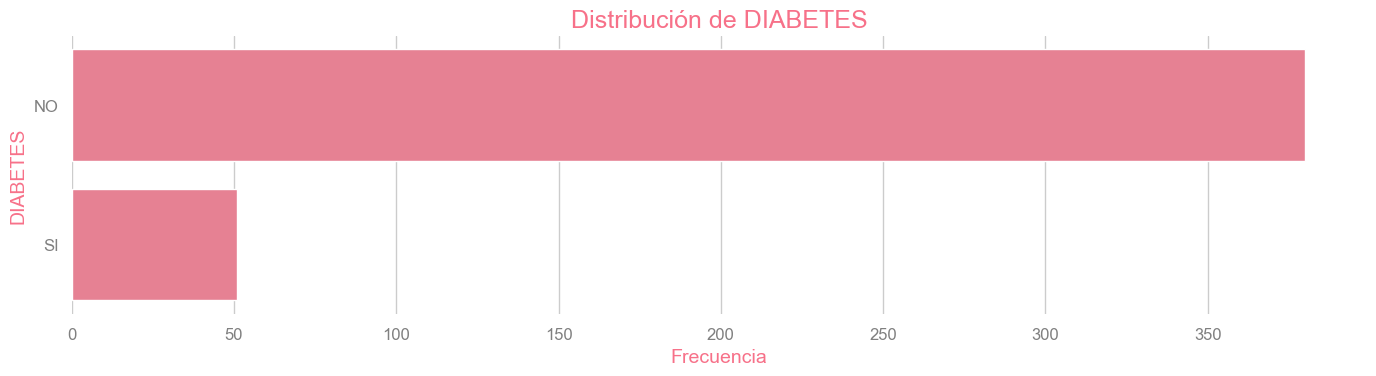

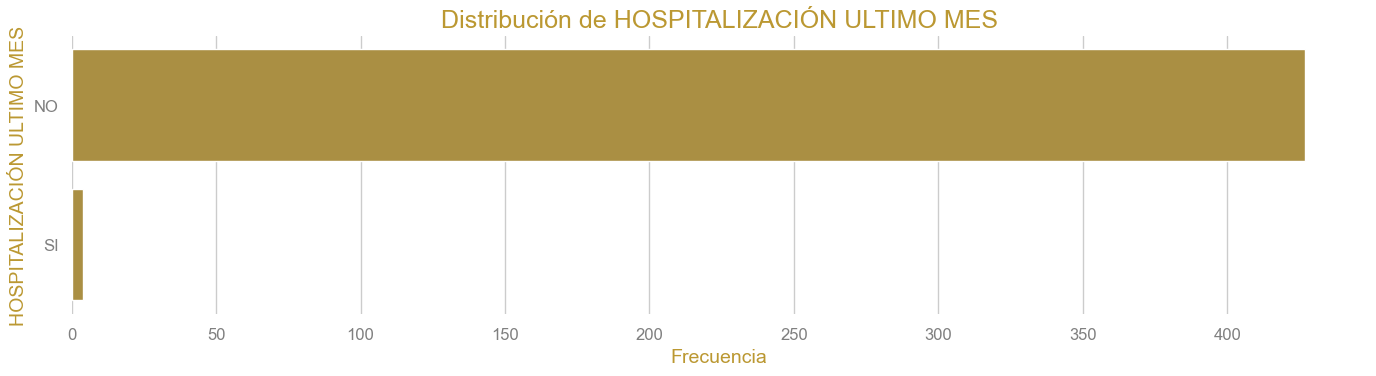

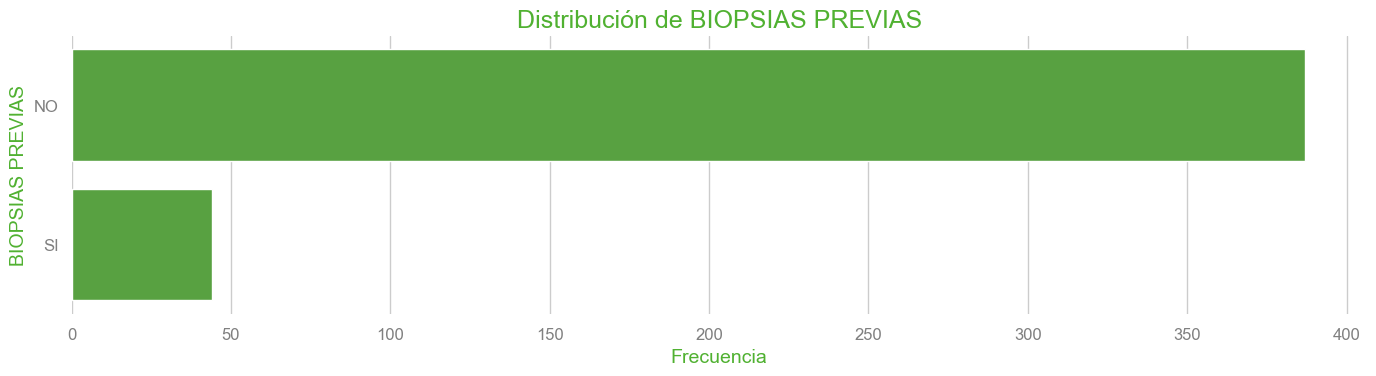

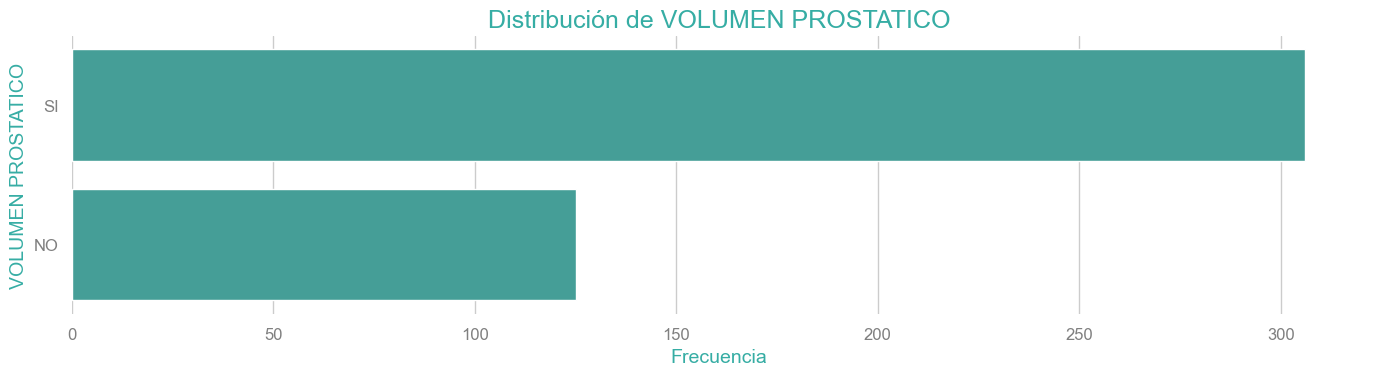

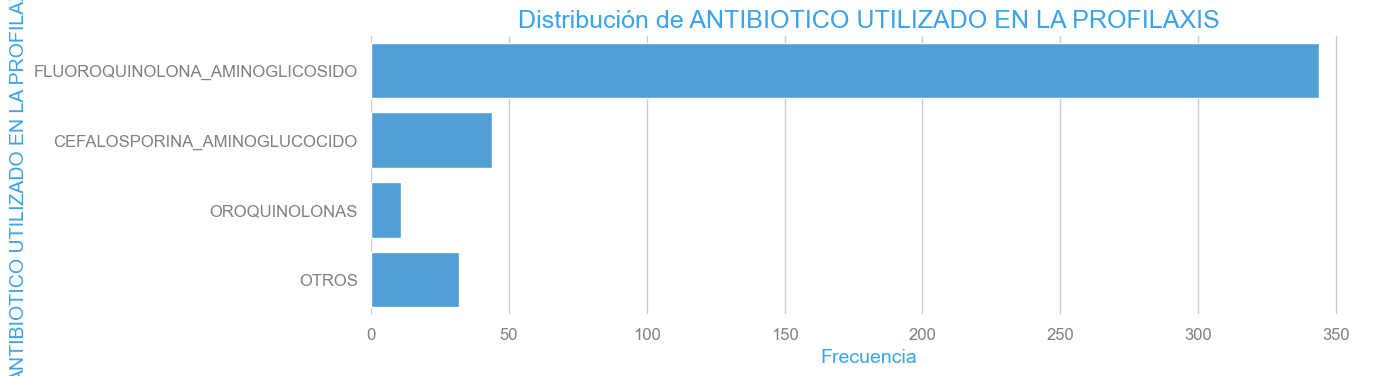

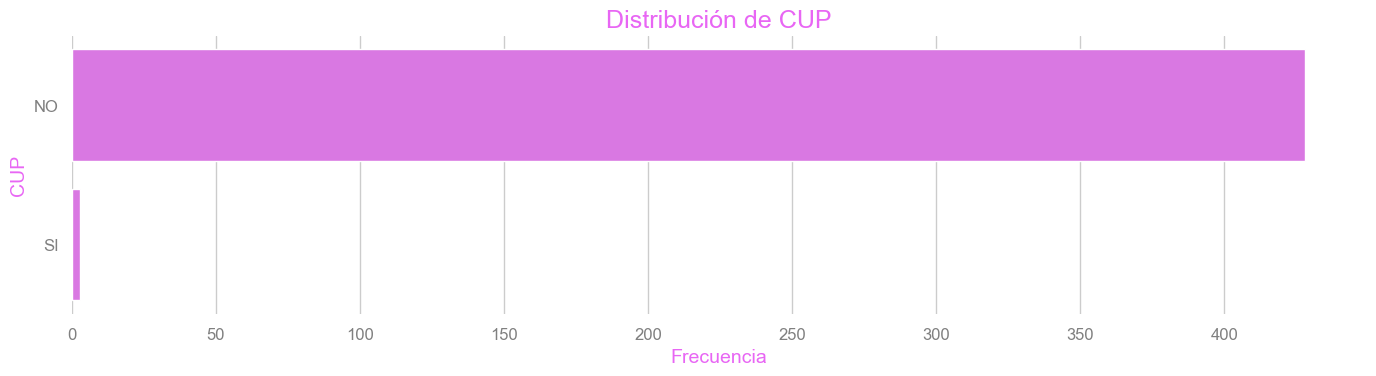

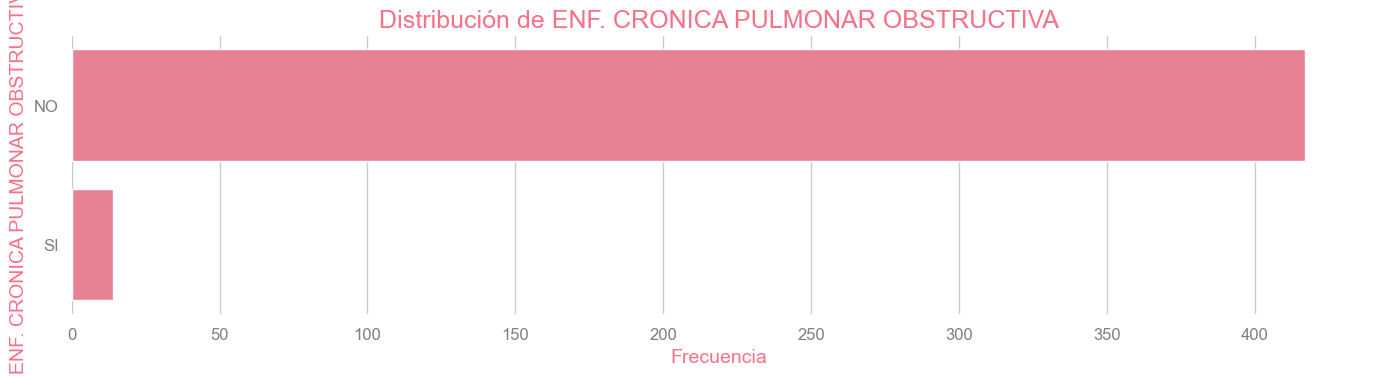

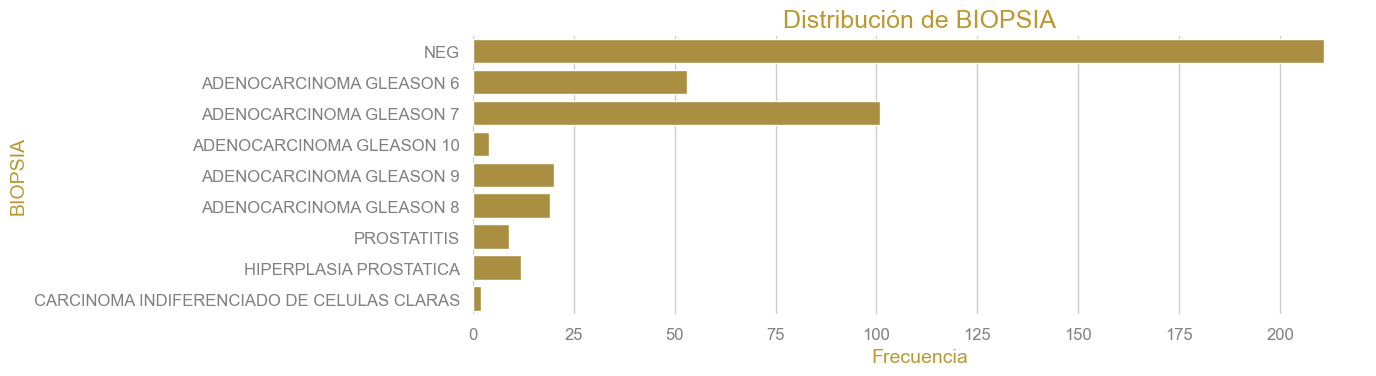

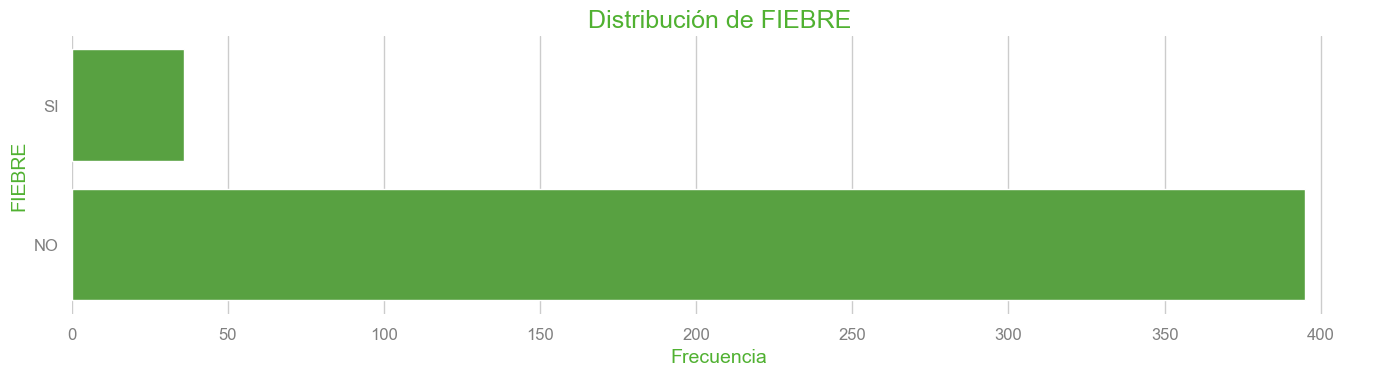

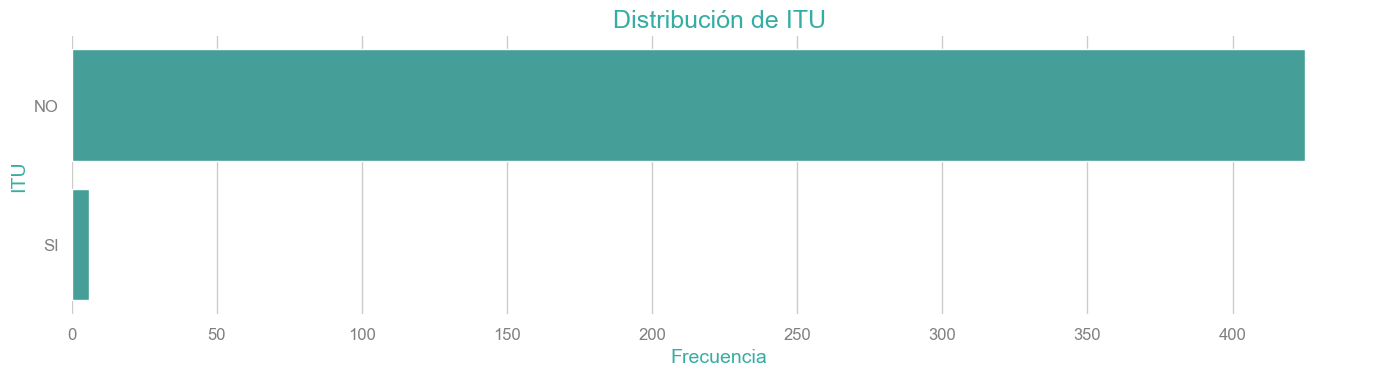

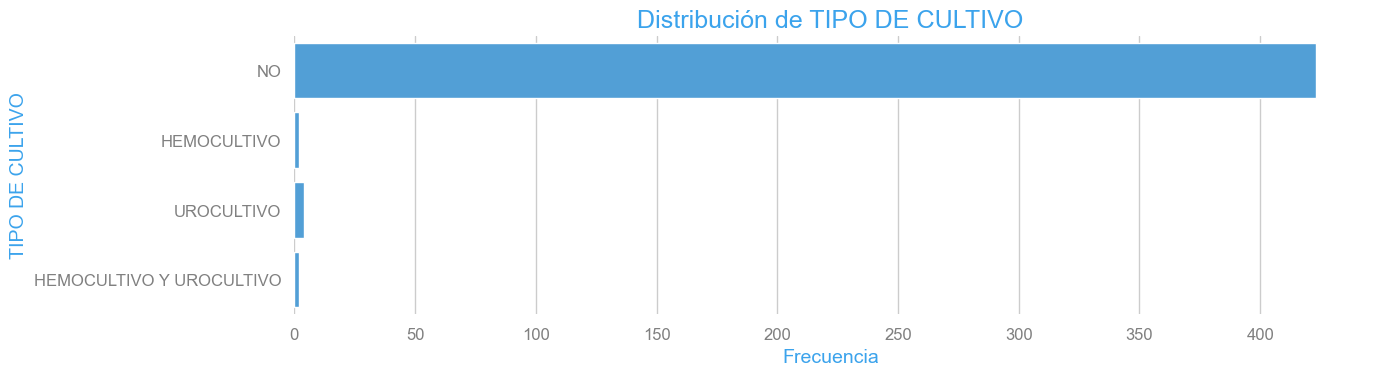

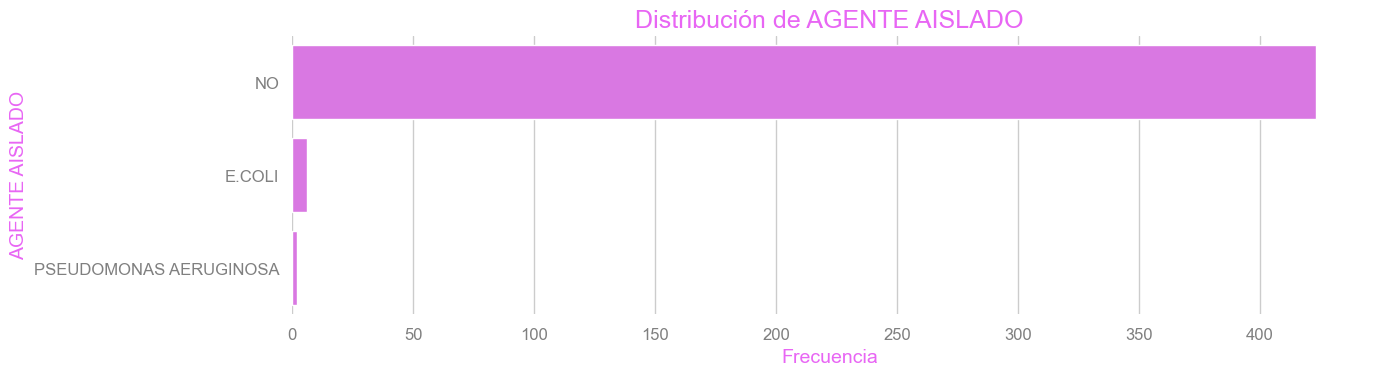

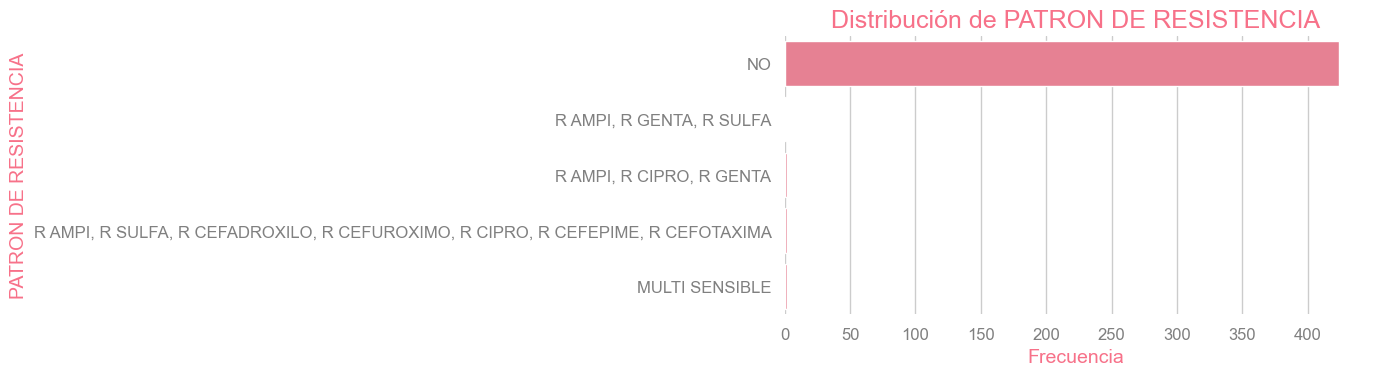

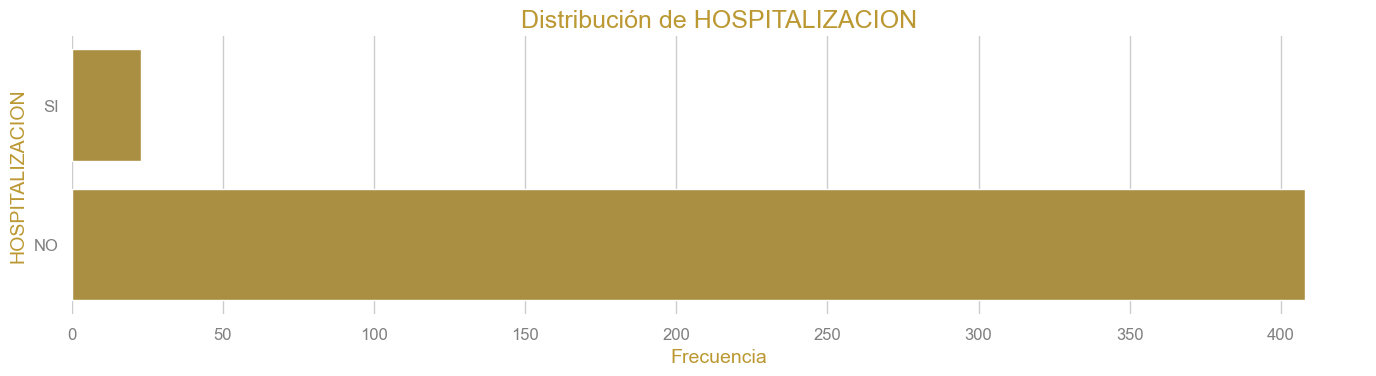

In [75]:
# Paleta de colores
colors = cycle(sns.color_palette("husl"))

# Configuraciones globales de estilo
sns.set(style="whitegrid", font_scale=1.2)

columnas = ['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 
            'ANTIBIOTICO UTILIZADO EN LA PROFILAXIS', 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 
            'BIOPSIA', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 
            'HOSPITALIZACION']

for columna in columnas:
    # Seleccionar un color de la paleta
    color = next(colors)
    
    # Configuraciones del gráfico
    plt.figure(figsize=(14, 4))
    sns.countplot(data=df, y=df[columna], palette=[color])
    plt.title(f'Distribución de {columna}', fontsize=18, color=color)
    plt.xlabel('Frecuencia', fontsize=14, color=color)
    plt.ylabel(columna, fontsize=14, color=color)
    plt.yticks(fontsize=12, color='gray')
    plt.xticks(fontsize=12, color='gray')
    
    # Estilo del fondo
    sns.despine(left=True, bottom=True)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()


En el siguiente mapa de calor (heatmap), se presenta de manera concisa el porcentaje de datos para cada variable (eje y) y las categorías asociadas a dichas variables (eje x). Este análisis se realiza con el propósito de evaluar la constancia de algunas variables. En particular, se define como variable constante aquella en la cual una de sus categorías abarca más del 99% de las etiquetas correspondientes. La elección del 99% se justifica por la observación de que la variable objetivo presenta aproximadamente el 95% de sus categorías con una sola clase. El objetivo es identificar y eliminar aquellas variables que exhiban una proporción significativa de valores constantes.

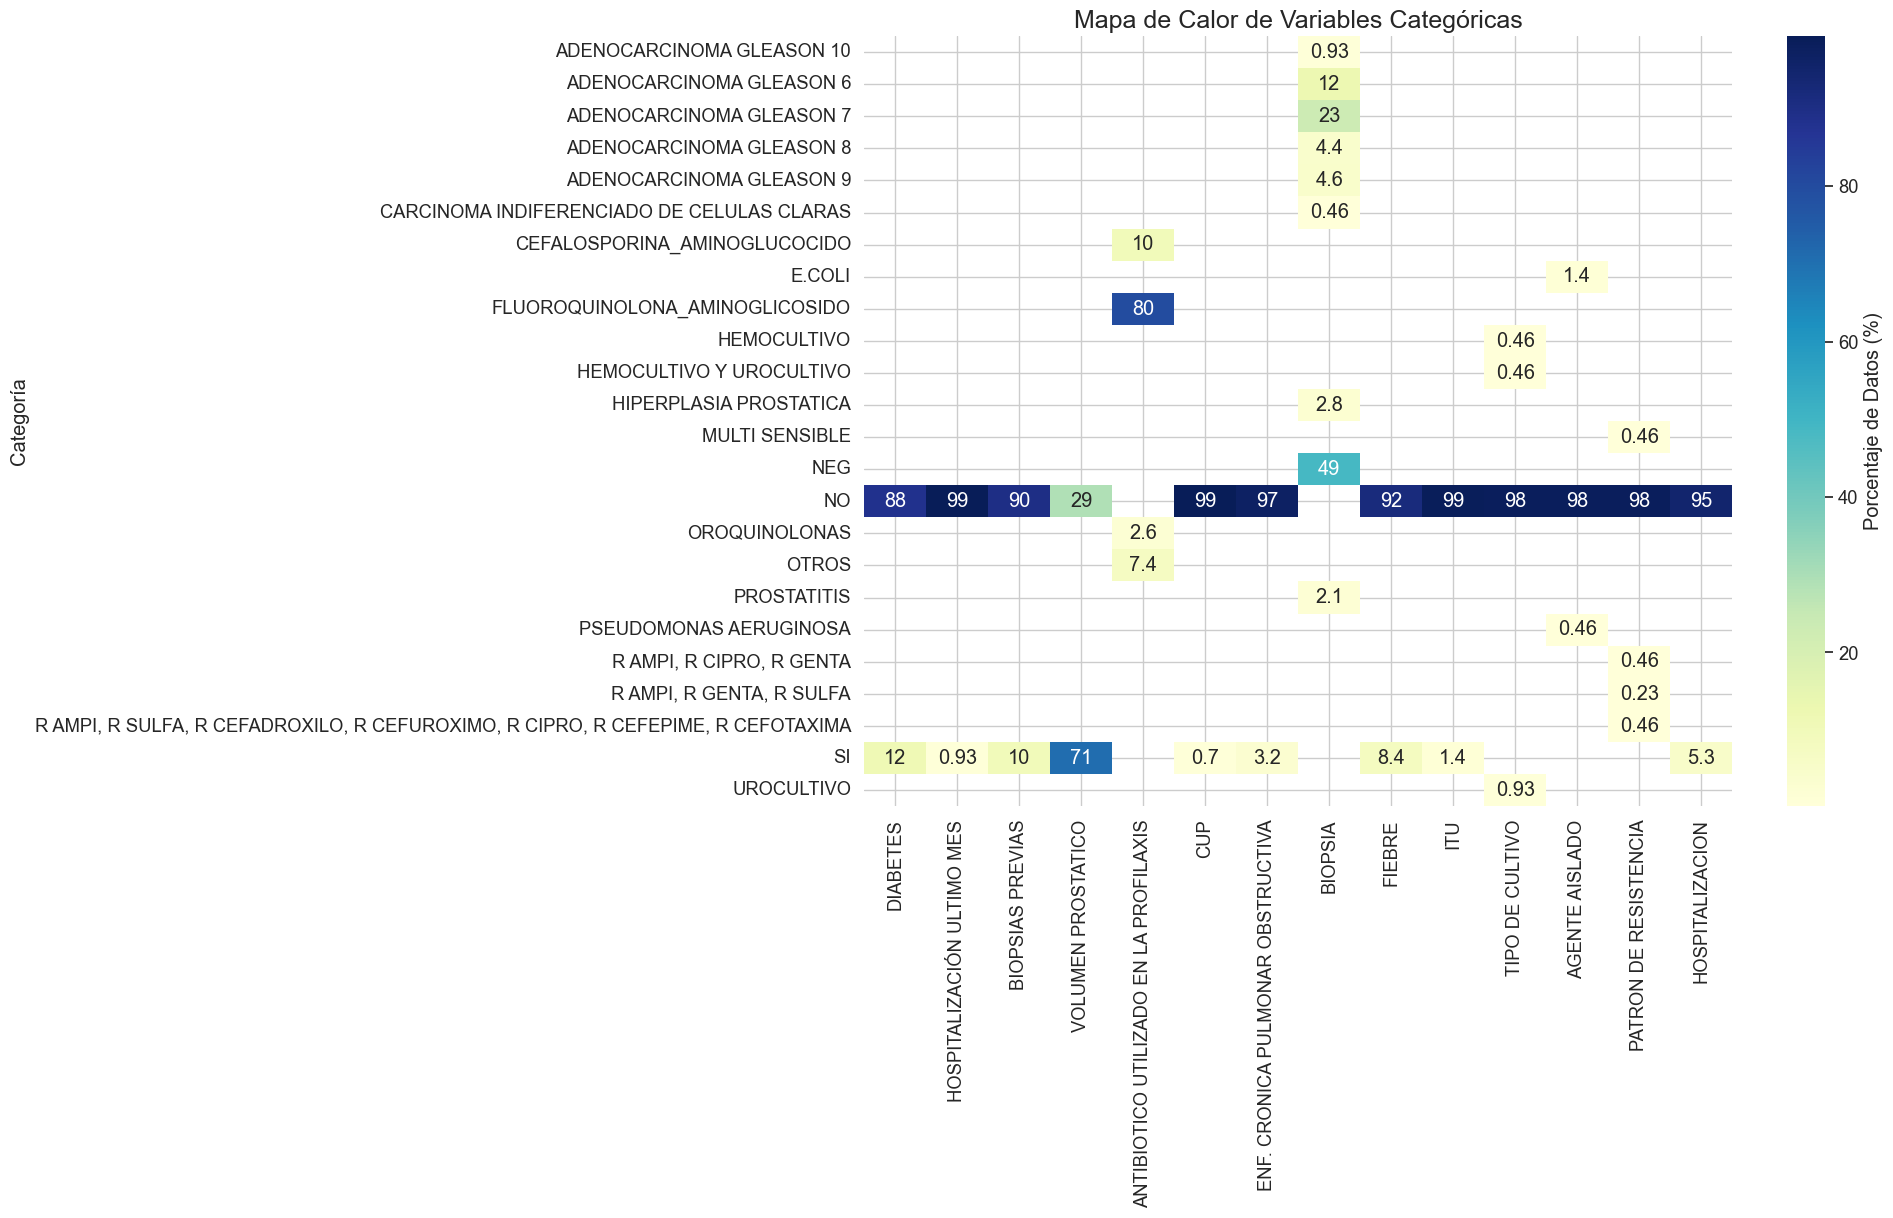

In [76]:
# Crear un DataFrame de resumen para las variables categóricas
summary_df = pd.DataFrame()

# Iterar a través de cada columna en el DataFrame original
for column in df.columns:
    # Verificar si la columna es de tipo 'object'
    if df[column].dtype == 'object':
        # Obtener las categorías únicas y sus recuentos
        category_counts = df[column].value_counts(normalize=True)
        
        # Crear un DataFrame temporal para esta columna
        temp_df = pd.DataFrame({
            'Categoría': category_counts.index,
            column: category_counts.values * 100
        })
        
        # Establecer la columna 'Categoría' como índice para el DataFrame temporal
        temp_df.set_index('Categoría', inplace=True)
        
        # Unir el DataFrame temporal al resumen general
        summary_df = pd.concat([summary_df, temp_df], axis=1, sort=True)

# Reemplazar los valores NaN con cadenas vacías
summary_df.replace({-1: ''}, inplace=True)

# Configurar el estilo y tamaño del mapa de calor
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid", font_scale=1.2)

# Crear un mapa de calor con anotaciones
sns.heatmap(summary_df, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Porcentaje de Datos (%)'})

# Agregar título y mostrar la visualización
plt.title('Mapa de Calor de Variables Categóricas', fontsize=18)
plt.show()



A partir de este mapa de calor, se ha identificado que las variables **HOSPITALIZACIÓN ULTIMO MES** y **CUP** exhiben un fenómeno donde el 99% de los datos pertenecen a una única categoría, específicamente, 'NO' y que las columnas **DIAS HOSPITALIZACION MQ** y **DIAS HOSPITALIZACIÓN UPC** son irrelevantes. En consecuencia, se ha tomado la decisión de eliminar estas variables del conjunto de datos.

In [77]:
df.drop(columns=['HOSPITALIZACIÓN ULTIMO MES', 'CUP', 'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC'], inplace=True)
df.columns

Index(['EDAD', 'DIABETES', 'PSA', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION'],
      dtype='object')

## Codificación del dataset

En vista de la presencia de variables categóricas y el interés en explorar posibles correlaciones significativas con la variable objetivo, se requiere la codificación numérica de estas categorías. Este proceso es esencial para facilitar la interpretación de los datos por parte de los modelos de Machine Learning. A continuación, se lleva a cabo la codificación, un paso crítico para asegurar la adecuada preparación de los datos con miras a análisis más avanzados y modelado predictivo.

In [80]:
# Separar columnas numéricas y categóricas
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Crear una copia del DataFrame original
encoded_df = df.copy()

# Aplicar label encoding a las columnas categóricas
label_encoder = LabelEncoder()
for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

# Mostrar el DataFrame codificado
encoded_df

,EDAD,DIABETES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
0,53,0,4.0,0,1,1,12,0,7,1,1,0,2,1,1,1
1,56,0,7.7,0,1,1,12,0,7,1,1,0,2,1,1,1
2,57,0,29.0,1,1,1,24,0,7,1,1,0,0,0,3,1
3,56,0,7.0,0,1,1,12,0,7,1,1,0,2,1,1,1
4,55,0,29.0,1,1,1,24,0,7,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,55,0,5.0,0,0,1,12,0,2,0,0,0,2,1,1,0
429,70,1,18.0,0,1,1,12,0,7,0,0,0,2,1,1,0
430,75,0,75.0,0,1,1,12,0,3,0,0,0,2,1,1,0
431,67,0,6.0,0,1,1,12,0,1,0,0,0,2,1,1,0


## Correlación

Para finalizar, se analiza la correlación entre las variables que quedan del dataset para identificar variables con alta correlación entre sí o con la variable objetivo.

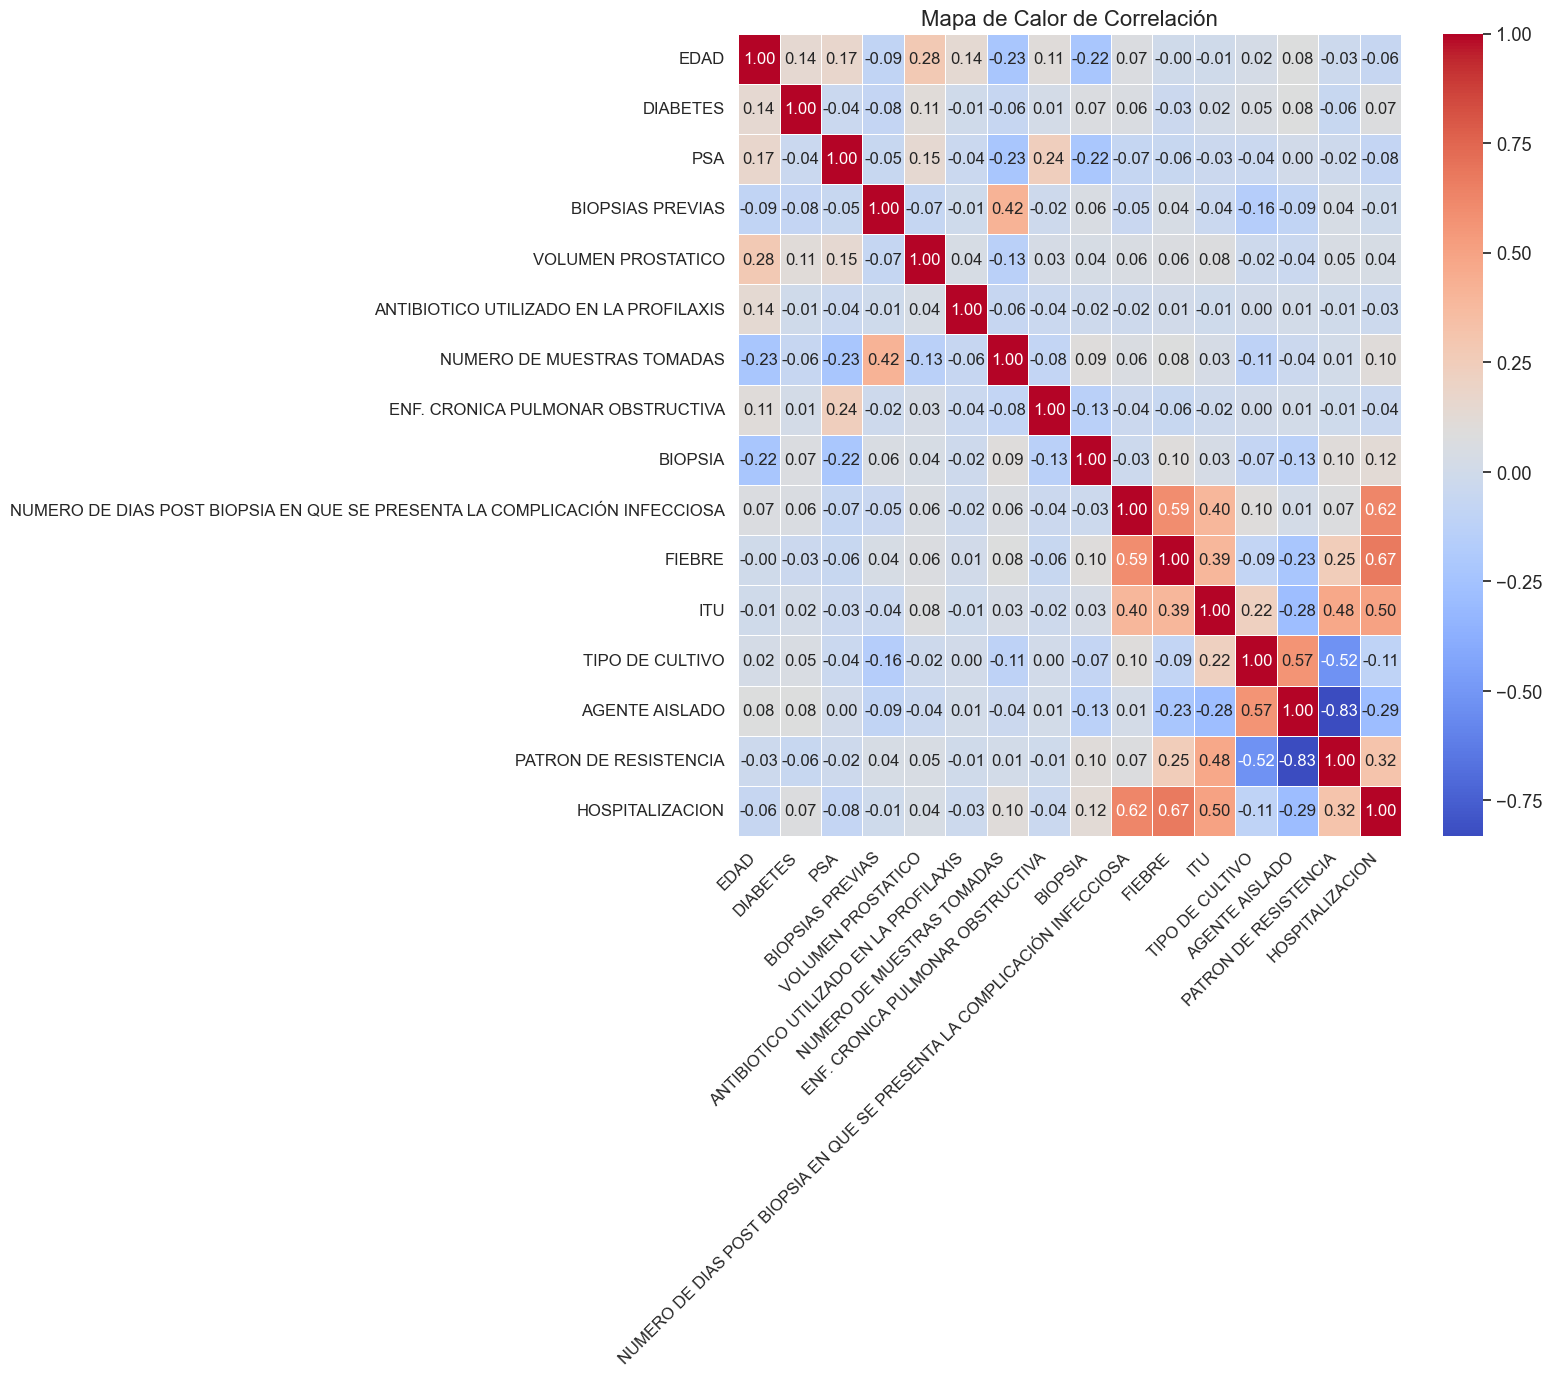

In [89]:
# Calcula la correlación
corr = encoded_df.corr()

# Configura el estilo y tamaño del gráfico
plt.figure(figsize=(16, 14))
sns.set(font_scale=1.2)

# Crea el mapa de calor
sns.heatmap(corr, cbar=True, square=False, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, annot_kws={'size': 12})

# Configura las etiquetas y límites
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Mapa de Calor de Correlación', fontsize=16)

# Ajusta el diseño para una mejor visualización
plt.tight_layout()

# Muestra el mapa de calor
plt.show()


Desde la matriz, es evidente que hay una significativa correlación lineal entre **FIEBRE** y **NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA**, y ambas presentan una fuerte asociación con la variable objetivo **HOSPITALIZACION**. En consideración a la facilidad de medición, se opta por excluir **NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA**, dejando **FIEBRE** como la variable preferida.

Asimismo, se nota una relación notable entre **AGENTE AISLADO**, **TIPO DE CULTIVO**, y **PATRON DE RESISTENCIA**. Por esta razón, se decide prescindir de **AGENTE AISLADO** y **PATRON DE RESISTENCIA**.

In [91]:
df = df.drop(columns=['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA'])
encoded_df = encoded_df.drop(columns=['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA', 'AGENTE AISLADO', 'PATRON DE RESISTENCIA'])
df.columns, encoded_df.columns

(Index(['EDAD', 'DIABETES', 'PSA', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
        'ANTIBIOTICO UTILIZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
        'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'FIEBRE', 'ITU',
        'TIPO DE CULTIVO', 'HOSPITALIZACION'],
       dtype='object'),
 Index(['EDAD', 'DIABETES', 'PSA', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
        'ANTIBIOTICO UTILIZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
        'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'FIEBRE', 'ITU',
        'TIPO DE CULTIVO', 'HOSPITALIZACION'],
       dtype='object'))

Se visualiza nuevamente la matriz de correlación.

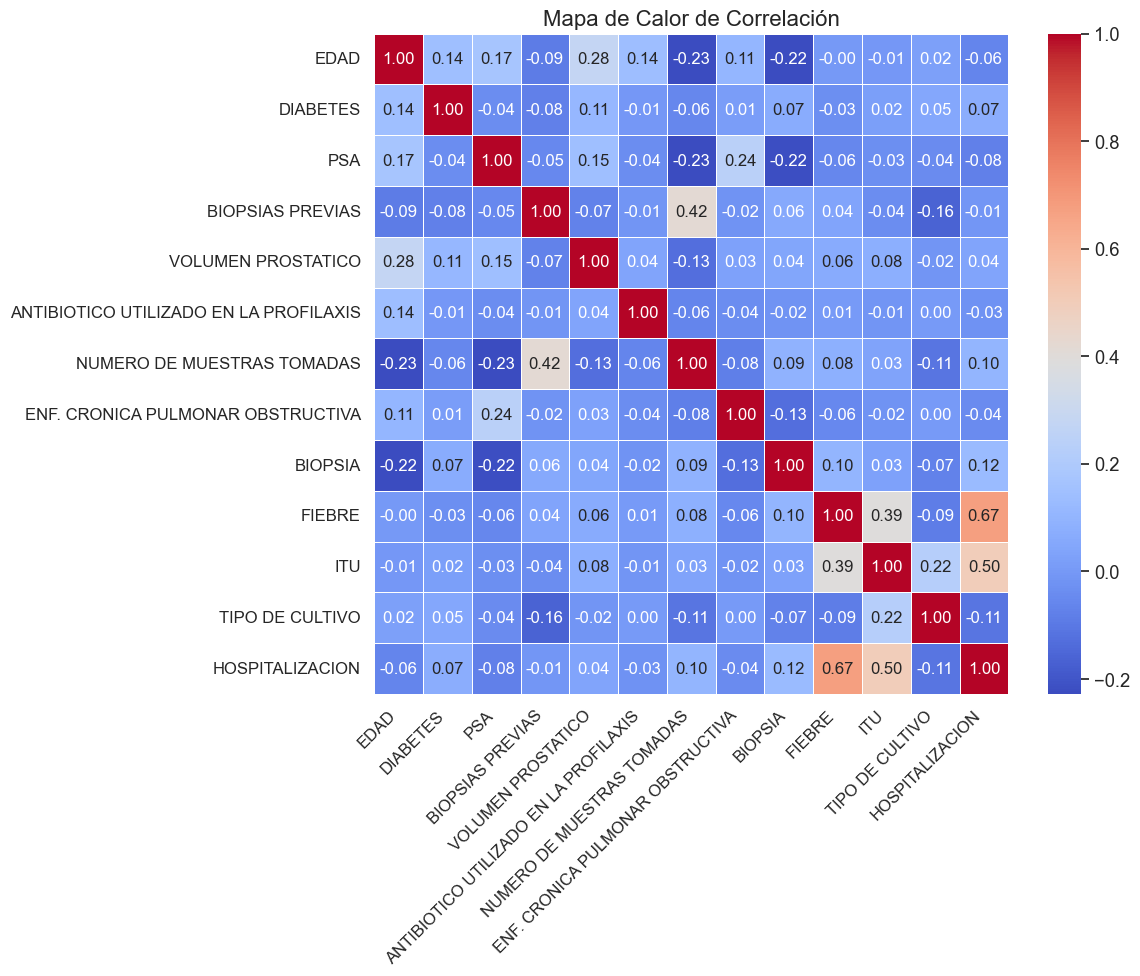

In [95]:
# Calcula la correlación
corr = encoded_df.corr()

# Configura el estilo y tamaño del gráfico
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)

# Crea el mapa de calor
sns.heatmap(corr, cbar=True, square=False, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, annot_kws={'size': 12})

# Configura las etiquetas y límites
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Mapa de Calor de Correlación', fontsize=16)

# Ajusta el diseño para una mejor visualización
plt.tight_layout()

# Muestra el mapa de calor
plt.show()

# Guardamos los cambios en archivos csv

In [96]:
df_a = 'Datasets/Hospitalizacion_a.csv'
df_c = 'Datasets/Hospitalizacion_c.csv'

df.to_csv(df_a, index=False, encoding='utf-8')
encoded_df.to_csv(df_c, index=False, encoding='utf-8')